In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
# Reading the data from the Pre-processed file
data = pd.read_csv('cleaned_data.csv')
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Drop the target column from features
X = data.drop(columns=['income'])
y = data['income']

# Convert categorical variables into numerical representation (One-Hot Encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
print("Feature Importance:")
print(feature_importance)

Accuracy: 0.8532374100719424
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      6830
        >50K       0.72      0.65      0.68      2205

    accuracy                           0.85      9035
   macro avg       0.81      0.79      0.79      9035
weighted avg       0.85      0.85      0.85      9035

Feature Importance:
                            Feature  Importance
0                               age    0.151749
1                            fnlwgt    0.172844
2                      capital-gain    0.099631
3                      capital-loss    0.032901
4                    hours-per-week    0.082936
..                              ...         ...
98          native-country_Thailand    0.000056
99   native-country_Trinadad&Tobago    0.000091
100    native-country_United-States    0.005479
101          native-country_Vietnam    0.000237
102       native-country_Yugoslavia    0.000238

[103 rows x 2 columns]


# Confusion Matrix

Confusion Matrix:
[[6272  558]
 [ 768 1437]]


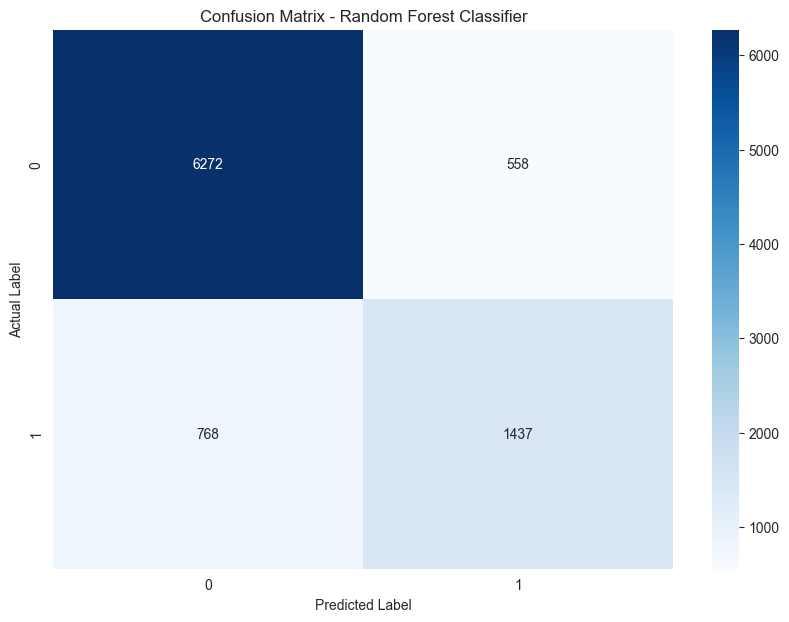

In [5]:
from sklearn.metrics import confusion_matrix

# Construct confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
